In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Display all the columns of the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
titanic  = pd.read_csv('train.csv')
print(f"Number of rows/records: {titanic.shape[0]}")
print(f"Number of columns/variables: {titanic.shape[1]}")
titanic.head()

Number of rows/records: 891
Number of columns/variables: 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

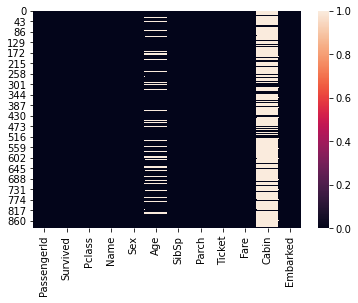

In [6]:
sns.heatmap(titanic.isna())

In [7]:
titanic.Age.fillna(titanic.Age.mean(), inplace = True )
titanic.drop('Cabin', axis = 1, inplace = True)

In [8]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
sex = pd.get_dummies(titanic.Sex, drop_first = True)
embarked = pd.get_dummies(titanic.Embarked)

In [11]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
titanic = pd.concat([titanic, sex , embarked], axis = 1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0,1,0,0


In [14]:
titanic.rename(columns = {'male': 'Gender'}, inplace  = True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,0,1,0,0


In [15]:
titanic.drop(['PassengerId','Sex','Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
5,0,3,29.699118,0,0,8.4583,1,0,1,0
6,0,1,54.000000,0,0,51.8625,1,0,0,1
7,0,3,2.000000,3,1,21.0750,1,0,0,1
8,1,3,27.000000,0,2,11.1333,0,0,0,1
9,1,2,14.000000,1,0,30.0708,0,1,0,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

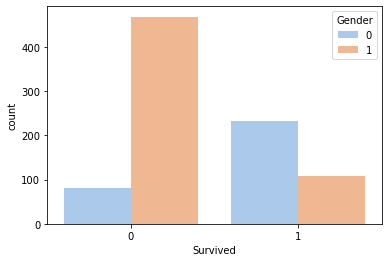

In [16]:
sns.countplot(x = 'Survived', data = titanic, hue= 'Gender', palette = 'pastel')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

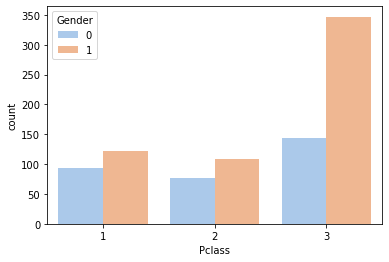

In [17]:
sns.countplot(x = 'Pclass', data = titanic, hue=  'Gender', palette = 'pastel')

In [18]:
de = titanic[(titanic.Pclass == 3 )]

<AxesSubplot:xlabel='Pclass', ylabel='count'>

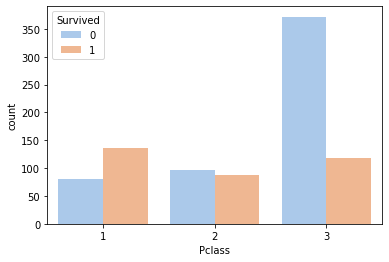

In [19]:
sns.countplot(x = 'Pclass', data = titanic, hue = "Survived", palette = 'pastel')

In [20]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [21]:
X = titanic.drop("Survived", axis = 1)
y = titanic['Survived']

In [22]:
from sklearn.model_selection import train_test_split 

In [23]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [24]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
709,3,29.699118,1,1,15.2458,1,1,0,0
439,2,31.000000,0,0,10.5000,1,0,0,1
840,3,20.000000,0,0,7.9250,1,0,0,1
720,2,6.000000,0,1,33.0000,0,0,0,1
39,3,14.000000,1,0,11.2417,0,1,0,0


In [25]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'C',
       'Q', 'S'],
      dtype='object')

In [26]:
num = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'C', 'Q', 'S']

=== Distribution of feature (before log transformation) ===


C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

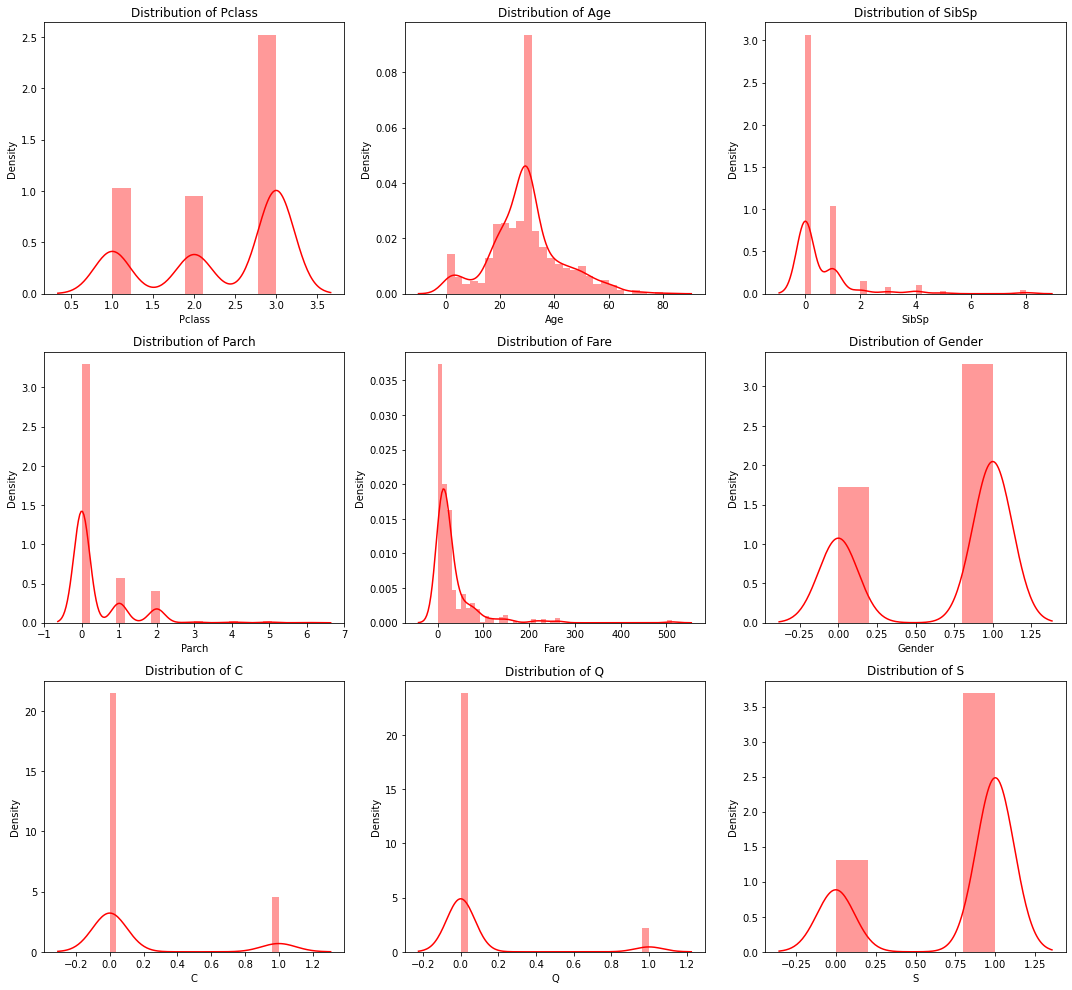

In [27]:
print(f'=== Distribution of feature (before log transformation) ===')
plt.figure(figsize = (15,18))
for i, col in enumerate(num):
    plt.subplot(4,3,i + 1); sns.distplot(X_train[col], color = 'red')
    plt.title(f'Distribution of {col}')

# show the plot
plt.tight_layout()
plt.show()

In [28]:
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [29]:
to_log = num
num

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'C', 'Q', 'S']

In [30]:
titanic_upd = log_transform(titanic, to_log)

=== Distribution of feature (before log transformation) ===


C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Zeid6\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

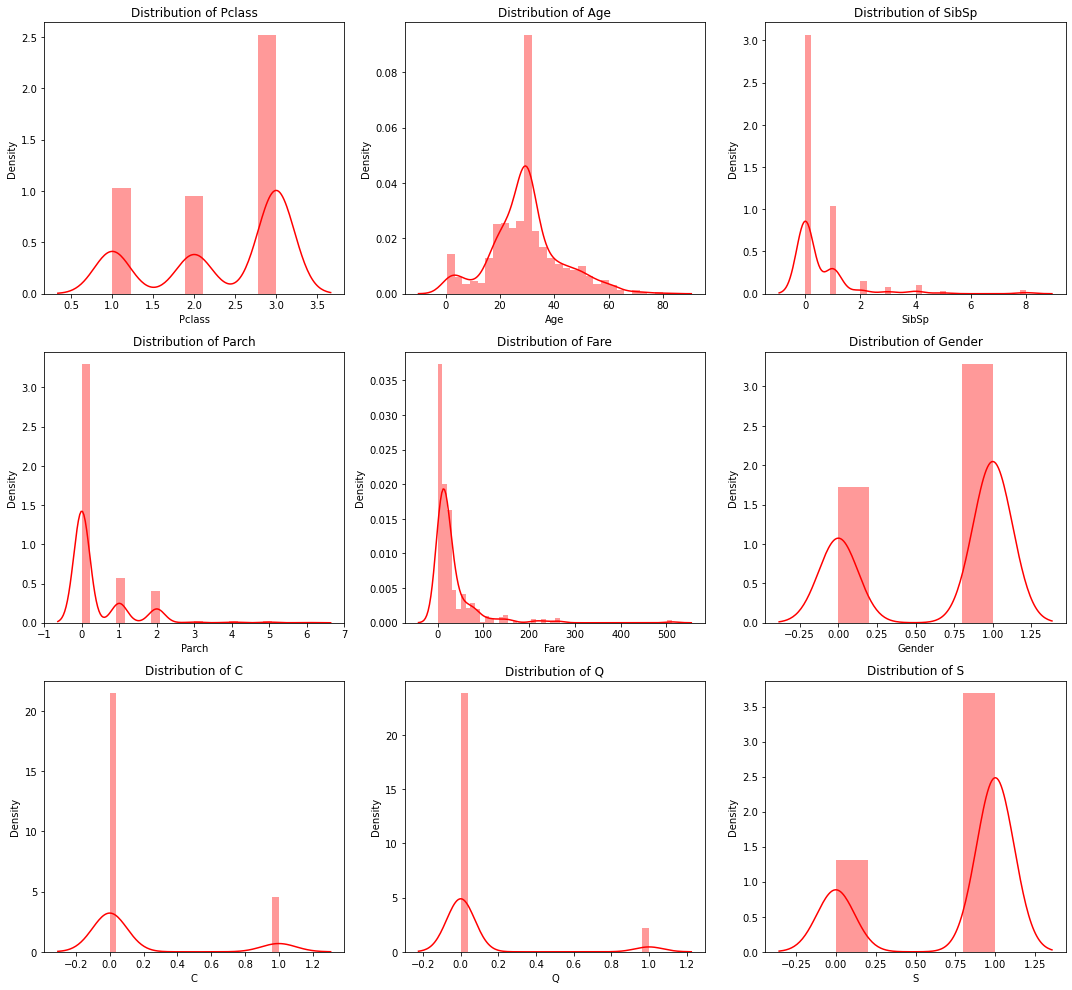

In [31]:
print(f'=== Distribution of feature (before log transformation) ===')
plt.figure(figsize = (15,18))
for i, col in enumerate(num):
    plt.subplot(4,3,i + 1); sns.distplot(X_train[col], color = 'red')
    plt.title(f'Distribution of {col}')

# show the plot
plt.tight_layout()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

C:\Users\Zeid6\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [36]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [20, 54]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

